# PETALO reconstruction: fast-fast MC full chain
This notebook describes how to perform PETALO 3D-PET reconstruction using fast-fast MC.<br>

In [1]:
# Add the line below so that plots will appear inline in the notebook.
%matplotlib inline

import os
import matplotlib.pyplot as plt
import numpy  as np

import antea.mcsim.errmat as emat
import antea.mcsim.phantom as ph
import antea.mcsim.fastfastmc as ffmc
import antea.reco.petalo_reconstruct as preco

In [2]:
ANTEADIR = os.environ["ANTEADIR"]
ANTEADATADIR = ANTEADIR + "testdata"
print(ANTEADIR)

/Users/jrenner/local/jerenner/ANTEA/antea/


## Run the fast-fast MC to generate events for a NEMA phantom

In [3]:
Nevts = 1000000

# Construct the phantom object.
PATH_PHANTOM = os.path.join(ANTEADATADIR, 'phantom_NEMAlike.npz')
phtm = ph.phantom(phantom_file=PATH_PHANTOM)

# Construct the error matrix objects.
PATH_ERRMAT_R = os.path.join(ANTEADATADIR, 'errmat_r.npz')
errmat_r = emat.errmat(PATH_ERRMAT_R)
PATH_ERRMAT_PHI = os.path.join(ANTEADATADIR, 'errmat_phi.npz')
errmat_phi = emat.errmat(PATH_ERRMAT_PHI)
PATH_ERRMAT_Z = os.path.join(ANTEADATADIR, 'errmat_z.npz')
errmat_z = emat.errmat(PATH_ERRMAT_Z)

# Run the simulation.
events = ffmc.run_fastfastmc(Nevts, phtm, errmat_r, errmat_phi, errmat_z)

Done 0 events
Done 100000 events
Done 200000 events
Done 300000 events
Done 400000 events
Done 500000 events
Done 600000 events
Done 700000 events
Done 800000 events
Done 900000 events


In [4]:
# Prepare the events.
r1 = events["reco_r1"].values; r2 = events["reco_r2"].values
phi1 = events["reco_phi1"]; phi2 = events["reco_phi2"].values

lor_x1 = r1*np.cos(phi1); lor_y1 = r1*np.sin(phi1); lor_z1 = events["reco_z1"].values; lor_t1 = events["true_t1"].values
lor_x2 = r2*np.cos(phi2); lor_y2 = r2*np.sin(phi2); lor_z2 = events["reco_z2"].values; lor_t2 = events["true_t2"].values

## Perform the 3D PET reconstruction

In [5]:
# Reconstruct the image.
rec = preco.PetaloReconstructor(libpath="{}../anteacpp/libPETALO.so".format(ANTEADIR))
rec.TOF_resolution = 200
rec.niterations = 5
img = rec.reconstruct(lor_x1, lor_y1, lor_z1, lor_t1, lor_x2, lor_y2, lor_z2, lor_t2)

Text(0, 0.5, 'y (mm)')

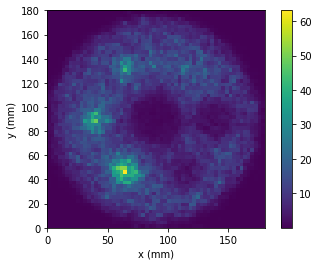

In [6]:
# Plot the reconstructed image (take a central slice).
plt.imshow(img[:,:,29].transpose(),extent=[0,180,0,180],origin='lower')
plt.colorbar()
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")